In [2]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver
# %matplotlib notebook

In [3]:
gantt = [
    {
        'entityID': "Wind",
        'timeWindow': [1800, 3600],
        'desc': "Strong wind",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Wind",
        'timeWindow': [7200, 9000],
        'desc': "Strong wind",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus1: Rain",
        'timeWindow': [2560, 5100],
        'desc': "Rain",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus1: No-fly",
        'timeWindow': [1800, 5100],
        'desc': 'No-fly',
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus1: No-fly",
        'timeWindow': [7200, 9000],
        'desc': "No-fly",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus1: Drone available",
        'timeWindow': [1245, 1800],
        'desc': r'$\tau^\prime_{10}=555$' + "[s]",
        'color': "blue",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Drone available",
        'timeWindow': [6600, 7200],
        'desc': r'$\tau^\prime_{11}=600$' + "[s]",
        'color': "blue",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Drone available",
        'timeWindow': [0, 1245],
        'desc': "Allow\nlaunching",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Drone available",
        'timeWindow': [5100, 6600],
        'desc': "launchable",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Drone available",
        'timeWindow': [9000, 10000],
        'desc': "launchable",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Epoch",
        'timeWindow': [0, 1245],
        'desc': "$e_{10}$",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Epoch",
        'timeWindow': [5100, 5400],
        'desc': "$e_{11}$",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Epoch",
        'timeWindow': [5400, 6600],
        'desc': "$e_{12}$",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus1: Epoch",
        'timeWindow': [9000, 10000],
        'desc': "$e_{13}$",
        'color': "green",
        'style': "solid"
    },
    
    {
        'entityID': "Cus2: Rain",
        'timeWindow': [2960, 5500],
        'desc': "Rain",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus2: No-fly",
        'timeWindow': [1800, 5500],
        'desc': 'No-fly',
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus2: No-fly",
        'timeWindow': [7200, 9000],
        'desc': "No-fly",
        'color': "gray",
        'style': "///"
    },
    {
        'entityID': "Cus2: Drone available",
        'timeWindow': [1000, 1800],
        'desc': r'$\tau^\prime_{20}=800$' + "[s]",
        'color': "blue",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Drone available",
        'timeWindow': [6200, 7200],
        'desc': r'$\tau^\prime_{21}=1000$' + "[s]",
        'color': "blue",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Drone available",
        'timeWindow': [0, 1000],
        'desc': "launchable",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Drone available",
        'timeWindow': [5500, 6200],
        'desc': "launchable",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Drone available",
        'timeWindow': [9000, 10000],
        'desc': "launchable",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Epoch",
        'timeWindow': [0, 1245],
        'desc': "$e_{20}$",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Epoch",
        'timeWindow': [5500, 6200],
        'desc': "$e_{21}$",
        'color': "green",
        'style': "solid"
    },
    {
        'entityID': "Cus2: Epoch",
        'timeWindow': [9000, 10000],
        'desc': "$e_{22}$",
        'color': "green",
        'style': "solid"
    },
    
]

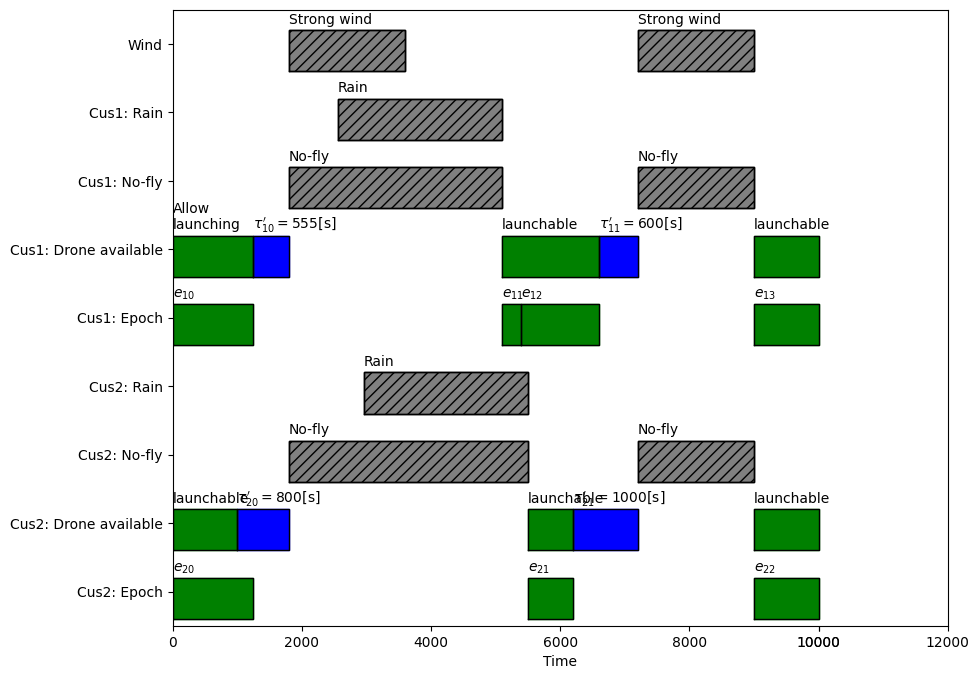

In [11]:
fig, ax = vrpSolver.plotGantt(
    gantt = gantt,
    figSize = (10, 8))